In [1]:
from datacube_ows.styles.api import plot_image_with_style_cfg

from pystac.client import Client
from odc.stac import load

from odc.geo.geom import BoundingBox

In [2]:
# Reload functions
%reload_ext autoreload
%autoreload 2

In [3]:
from ows_config.land_cover.seagrass import classification, probability, seagrass_60, seagrass

In [4]:
catalog = "https://stac.staging.digitalearthpacific.io"
collection = "dep_s2_seagrass"

client = Client.open(catalog)
# 
# 32.58405°S, 59.03594°W

lon = [178.32369, 178.52369]
lat = [-18.19583, 	-18.04583]

# western fiji bbox
bbox = BoundingBox(lon[0], lat[0], lon[1], lat[1])

items = client.search(collections=[collection], intersects=bbox.polygon).item_collection()

print(f"Found {len(items)} items")

Found 1 items


In [5]:
from odc.stac import configure_s3_access
 
configure_s3_access(aws_unsigned=True)
    
data = load(items, bbox=bbox, groupby="solar_day").compute()
data

<xarray.Dataset> Size: 16MB
Dimensions:                (y: 1747, x: 2228, time: 1)
Coordinates:
  * y                      (y) float64 14kB -2.03e+06 -2.03e+06 ... -2.047e+06
  * x                      (x) float64 18kB 3.153e+06 3.153e+06 ... 3.175e+06
    spatial_ref            int32 4B 3832
  * time                   (time) datetime64[ns] 8B 2024-01-01
Data variables:
    seagrass               (time, y, x) uint8 4MB 255 255 255 ... 255 255 255
    classification         (time, y, x) uint8 4MB 255 255 255 ... 255 255 255
    seagrass_probability   (time, y, x) uint8 4MB 255 255 255 ... 255 255 255
    seagrass_threshold_60  (time, y, x) uint8 4MB 255 255 255 ... 255 255 255

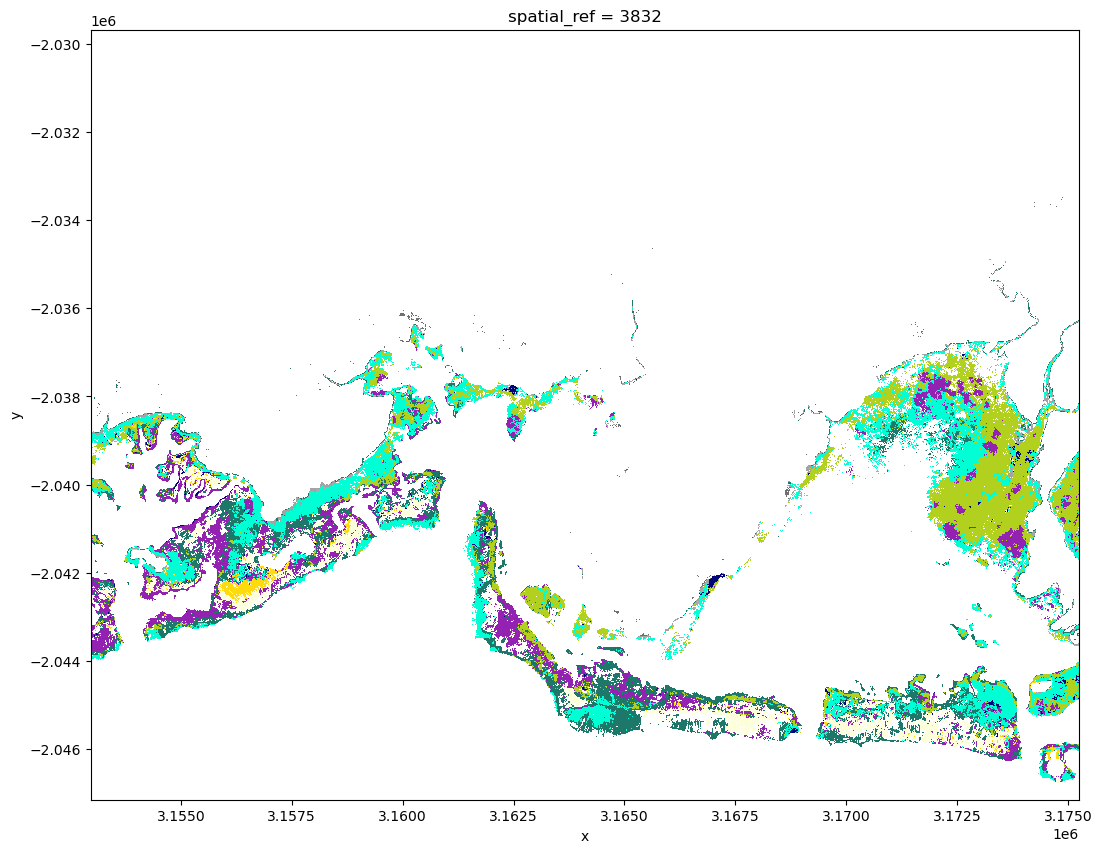

In [6]:
plot_image_with_style_cfg(classification, data)

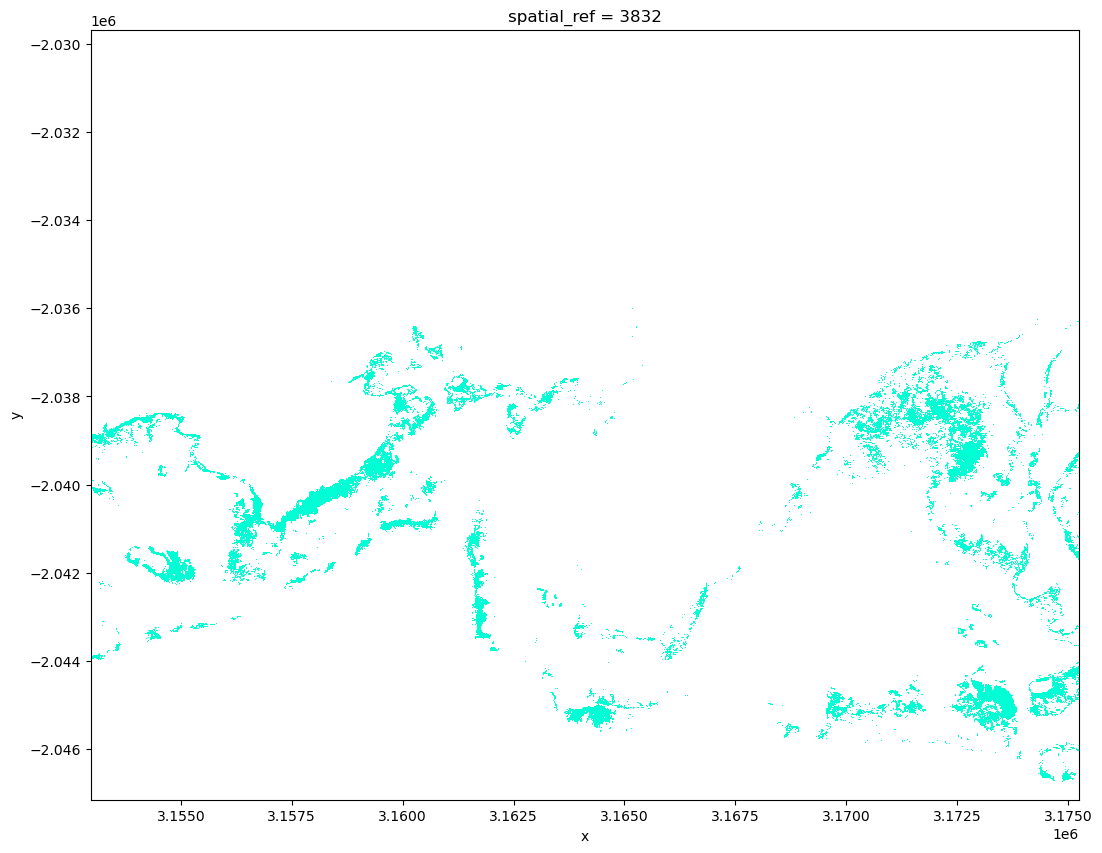

In [7]:
plot_image_with_style_cfg(seagrass, data)

In [8]:
# from datacube_ows.styles.api import generate_ows_legend_style_cfg

# style_mangroves = {
#     "name": "style_mangroves",
#     "title": "Mangrove Cover",
#     "abstract": "Mangrove Cover",
#     "needed_bands": ["mangroves"],
#     "index_function": {
#         "function": "datacube_ows.band_utils.single_band",
#         "mapped_bands": True,
#         "kwargs": {
#             "band": "mangroves",
#         },
#     },
#     "value_map": {
#         "mangroves": [
#             {
#                 "title": "No Mangroves",
#                 "abstract": "",
#                 "values": [0],
#                 "alpha": 1.0,
#                 "color": "#BDBDBD",
#             },
#             {
#                 "title": "Open Mangroves",
#                 "abstract": "",
#                 "values": [1],
#                 "color": "#5ECC00",
#             },
#             {
#                 "title": "Closed Mangroves",
#                 "abstract": "",
#                 "values": [2],
#                 "color": "#3B7F00",
#             }
#         ]
#     },
#     "legend": {"width": 2.5, "height": 1.0},
# }


# # Note this command will also display the legend in a JupyterHub/notebook-type environment)
# generate_ows_legend_style_cfg(style_mangroves)
